In [2]:
import pandas as pd
import pandas as pd
import sklearn

#from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [3]:
from sklearn import preprocessing
train1 = pd.read_csv(r'E:\project\FINAL\features.csv')
le=preprocessing.LabelEncoder()
le.fit(train1['FinalGrade'])
train1['FinalGrade']=le.transform(train1['FinalGrade'])
y=train1['FinalGrade']
# train1 = train1.drop(labels=['Regularity','Grade1','Grade2'],axis=1)

train1 = pd.get_dummies(train1)
# y=train1.FinalGrade
train1 = train1.drop(labels=['G3','FinalGrade'],axis=1)
train1.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Grade1_Excellent,Grade1_Failure,Grade1_Good,Grade1_Poor,Grade1_Satisfactory,Grade2_Excellent,Grade2_Failure,Grade2_Good,Grade2_Poor,Grade2_Satisfactory
0,18,4,4,2,2,0,4,3,4,1,...,0,1,0,0,0,0,0,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,0,1,0,0,0,0,1,0,0,0
2,15,1,1,1,2,3,4,3,2,2,...,0,0,0,1,0,0,0,0,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,0,1,0,0,0,0,0,0,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,0,0,0,0,1,0


In [4]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train1,y,random_state=0,test_size=0.3)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(276, 73)
(276,)
(119, 73)
(119,)


In [12]:
#Defining learning classifiers

names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD", "Logistic Regression"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2"),
    LogisticRegression()]
    #XGBClassifier(learning_rate=0.1,n_estimators=100)]

In [13]:
 #Build Model, Apply Model on Test Data & Record Accuracy Scores

scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    scores.append(score)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
scores

[0.7563025210084033,
 0.8151260504201681,
 0.24369747899159663,
 0.24369747899159663,
 0.8319327731092437,
 0.8571428571428571,
 0.7899159663865546,
 0.8235294117647058,
 0.8319327731092437,
 0.8067226890756303,
 0.7226890756302521,
 0.42857142857142855,
 0.3277310924369748,
 0.6638655462184874,
 0.8067226890756303]

In [15]:
import pandas as pd
import seaborn as sns
# Create data frame of model performance

df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Nearest_Neighbors,0.756303
1,Linear_SVM,0.815126
2,Polynomial_SVM,0.243697
3,RBF_SVM,0.243697
4,Gaussian_Process,0.831933
5,Gradient_Boosting,0.857143
6,Decision_Tree,0.789916
7,Extra_Trees,0.823529
8,Random_Forest,0.831933
9,Neural_Net,0.806723


In [16]:
#Adding colors to the data frame


cm = sns.light_palette("red", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,Nearest_Neighbors,0.756303
1,Linear_SVM,0.815126
2,Polynomial_SVM,0.243697
3,RBF_SVM,0.243697
4,Gaussian_Process,0.831933
5,Gradient_Boosting,0.857143
6,Decision_Tree,0.789916
7,Extra_Trees,0.823529
8,Random_Forest,0.831933
9,Neural_Net,0.806723


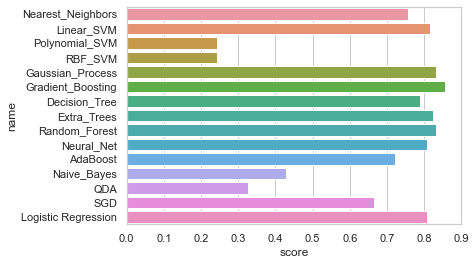

In [17]:
#Bar plot of model performance

sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)